In [185]:
import pandas as pd
import numpy as np

pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [186]:
df_hr = pd.read_csv('HRDataset_v14.csv')

In [187]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

from matplotlib import pyplot

In [188]:
pd.options.display.max_columns = 999

In [189]:
df_hr.tail()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
306,"Woodson, Jason",10135,0,0,1,1,5,3,0,65893,0,20,Production Technician II,MA,1810,05/11/85,M,Single,US Citizen,No,White,7/7/2014,NaN,N/A-StillEmployed,Active,Production,Kissy Sullivan,20.000,LinkedIn,Fully Meets,4.070,4,0,2/28/2019,0,13
307,"Ybarra, Catherine",10301,0,0,0,5,5,1,0,48513,1,19,Production Technician I,MA,2458,05/04/82,F,Single,US Citizen,No,Asian,9/2/2008,9/29/2015,Another position,Voluntarily Terminated,Production,Brannon Miller,12.000,Google Search,PIP,3.200,2,0,9/2/2015,5,4
308,"Zamora, Jennifer",10010,0,0,0,1,3,4,0,220450,0,6,CIO,MA,2067,08/30/79,F,Single,US Citizen,No,White,4/10/2010,NaN,N/A-StillEmployed,Active,IT/IS,Janet King,2.000,Employee Referral,Exceeds,4.600,5,6,2/21/2019,0,16
309,"Zhou, Julia",10043,0,0,0,1,3,3,0,89292,0,9,Data Analyst,MA,2148,02/24/79,F,Single,US Citizen,No,White,3/30/2015,NaN,N/A-StillEmployed,Active,IT/IS,Simon Roup,4.000,Employee Referral,Fully Meets,5.000,3,5,2/1/2019,0,11
310,"Zima, Colleen",10271,0,4,0,1,5,3,0,45046,0,19,Production Technician I,MA,1730,08/17/78,F,Widowed,US Citizen,No,Asian,9/29/2014,NaN,N/A-StillEmployed,Active,Production,David Stanley,14.000,LinkedIn,Fully Meets,4.500,5,0,1/30/2019,0,2


In [190]:
df_hr['Salary'].nunique()

308

In [191]:
df_hr['PositionID'].nunique()

30

In [192]:
# тк их 30, точно понадобится их скалировать

In [193]:
df_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

In [194]:
# Нулевые значения присутствую в дате увольнения - логично, кто-то еще работает
# и в ManagerID - вероятно, 8 сотрудников - топ менеджеры, которые не имеют руководителя
# хотя это странно, должен быть только один - ГД)

Text(0, 0.5, 'Amount of employees')

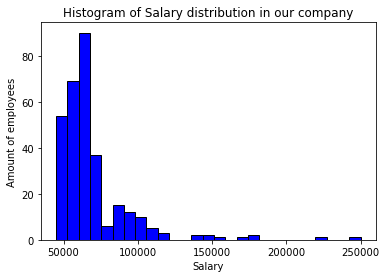

In [195]:
# matplotlib histogram
plt.hist(df_hr['Salary'], color = 'blue', edgecolor = 'black',
         bins = int(27))

# Add labels
plt.title('Histogram of Salary distribution in our company')
plt.xlabel('Salary')
plt.ylabel('Amount of employees')

Text(0, 0.5, 'Amount of employees')

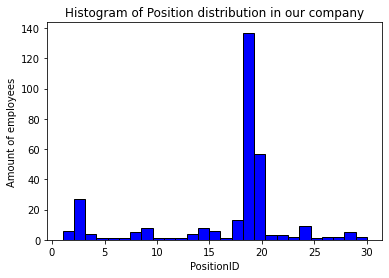

In [196]:
# matplotlib histogram
plt.hist(df_hr['PositionID'], color = 'blue', edgecolor = 'black',
         bins = int(27))

# Add labels
plt.title('Histogram of Position distribution in our company')
plt.xlabel('PositionID')
plt.ylabel('Amount of employees')

In [197]:
# Большинство сотрудников занимают одну и ту же должность, вероятно какая-то массовая позиция. 
# Также Большинство получают одну и ту же зп - в районе 65 000

In [223]:
X = df_hr[['PerfScoreID', 'PositionID', 'EmpSatisfaction', 'SpecialProjectsCount']]
Y = df_hr[['Salary']]

In [224]:
X

,PerfScoreID,PositionID,EmpSatisfaction,SpecialProjectsCount
0,4,19,5,0
1,3,27,3,6
2,3,20,3,0
3,3,19,5,0
4,3,19,4,0
...,...,...,...,...
306,3,20,4,0
307,1,19,2,0
308,4,6,5,6
309,3,9,3,5


In [225]:
Y

,Salary
0,62506
1,104437
2,64955
3,64991
4,50825
...,...
306,65893
307,48513
308,220450
309,89292


In [226]:
from sklearn.model_selection import train_test_split

In [227]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state=42)


In [228]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [229]:
# посмотрим, какие из наших признаков оказались наиболее значимыми для определения зарплаты на объектах
importance = lin_model.coef_

print(importance)

[[3158.95966242 -157.78894131  343.41457061 4709.75067269]]


In [230]:
def scaling(df):
    scaler = MinMaxScaler() 
    data_scaled = scaler.fit_transform(df)
    df_scaled = pd.DataFrame(data_scaled)
    return df_scaled

In [231]:
X = df_hr[['PerfScoreID', 'PositionID', 'EmpSatisfaction', 'SpecialProjectsCount']]

X_scaled = scaling(X)

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state=42)

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

importance = lin_model.coef_
print(importance)

[[ 9476.87898727 -4575.8792979   1373.65828243 37678.00538153]]


In [232]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [234]:
# Определим функцию оценки ошибки получившейся модели:

def model_access(lin_model, X_train, X_test, Y_train, Y_test):

    # model evaluation for training set
    y_train_predict = lin_model.predict(X_train)
    rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
    r2 = r2_score(Y_train, y_train_predict)

    
    print("\n")
    print("The model performance for training set")
    print("--------------------------------------")
    print('RMSE is {}'.format(rmse))
    print('R2 score is {}'.format(r2))
    print("--------------------------------------")
    print("\n")

    
    # model evaluation for testing set
    y_test_predict = lin_model.predict(X_test)
    rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
    r2 = r2_score(Y_test, y_test_predict)

    print("The model performance for testing set")
    print("--------------------------------------")
    print('RMSE is {}'.format(rmse))
    print('R2 score is {}'.format(r2))

In [235]:
model_access(lin_model, X_train, X_test, Y_train, Y_test)



The model performance for training set
--------------------------------------
RMSE is 21315.28699774301
R2 score is 0.22058154453771484
--------------------------------------


The model performance for testing set
--------------------------------------
RMSE is 22165.0959127419
R2 score is 0.3930370009378965


In [236]:
from sklearn.preprocessing import LabelEncoder

In [241]:
# creat1ing initial dataframe
temp_df = pd.DataFrame(df_hr[['State', 'RaceDesc', 'HispanicLatino', 'ManagerID']])

# creating instance of labelencoder
labelencoder = LabelEncoder()

# Assigning numerical values and storing in another column
df_hr['State_id'] = labelencoder.fit_transform(temp_df['State'])
df_hr['Race_id'] = labelencoder.fit_transform(temp_df['RaceDesc'])
df_hr['HispanicLatino_id'] = labelencoder.fit_transform(temp_df['HispanicLatino'])
df_hr['ManagerID_id'] = labelencoder.fit_transform(temp_df['ManagerID'])

df_hr.head(10)

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,State_id,Race_id,HispanicLatino_id,ManagerID_id
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,0,19,Production Technician I,MA,1960,07/10/83,M,Single,US Citizen,No,White,7/5/2011,NaN,N/A-StillEmployed,Active,Production,Michael Albert,22.000,LinkedIn,Exceeds,4.600,5,0,1/17/2019,0,1,10,5,0,20
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,1,27,Sr. DBA,MA,2148,05/05/75,M,Married,US Citizen,No,White,3/30/2015,6/16/2016,career change,Voluntarily Terminated,IT/IS,Simon Roup,4.000,Indeed,Fully Meets,4.960,3,6,2/24/2016,0,17,10,5,0,3
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,1,20,Production Technician II,MA,1810,09/19/88,F,Married,US Citizen,No,White,7/5/2011,9/24/2012,hours,Voluntarily Terminated,Production,Kissy Sullivan,20.000,LinkedIn,Fully Meets,3.020,3,0,5/15/2012,0,3,10,5,0,18
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,0,19,Production Technician I,MA,1886,09/27/88,F,Married,US Citizen,No,White,1/7/2008,NaN,N/A-StillEmployed,Active,Production,Elijiah Gray,16.000,Indeed,Fully Meets,4.840,5,0,1/3/2019,0,15,10,5,0,14
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,1,19,Production Technician I,MA,2169,09/08/89,F,Divorced,US Citizen,No,White,7/11/2011,9/6/2016,return to school,Voluntarily Terminated,Production,Webster Butler,39.000,Google Search,Fully Meets,5.000,4,0,2/1/2016,0,2,10,5,0,22
5,"Anderson, Linda",10002,0,0,0,1,5,4,0,57568,0,19,Production Technician I,MA,1844,05/22/77,F,Single,US Citizen,No,White,1/9/2012,NaN,N/A-StillEmployed,Active,Production,Amy Dunn,11.000,LinkedIn,Exceeds,5.000,5,0,1/7/2019,0,15,10,5,0,9
6,"Andreola, Colby",10194,0,0,0,1,4,3,0,95660,0,24,Software Engineer,MA,2110,05/24/79,F,Single,US Citizen,No,White,11/10/2014,NaN,N/A-StillEmployed,Active,Software Engineering,Alex Sweetwater,10.000,LinkedIn,Fully Meets,3.040,3,4,1/2/2019,0,19,10,5,0,8
7,"Athwal, Sam",10062,0,4,1,1,5,3,0,59365,0,19,Production Technician I,MA,2199,02/18/83,M,Widowed,US Citizen,No,White,9/30/2013,NaN,N/A-StillEmployed,Active,Production,Ketsia Liebig,19.000,Employee Referral,Fully Meets,5.000,4,0,2/25/2019,0,19,10,5,0,17
8,"Bachiochi, Linda",10114,0,0,0,3,5,3,1,47837,0,19,Production Technician I,MA,1902,02/11/70,F,Single,US Citizen,No,Black or African American,7/6/2009,NaN,N/A-StillEmployed,Active,Production,Brannon Miller,12.000,Diversity Job Fair,Fully Meets,4.460,3,0,1/25/2019,0,4,10,2,0,10
9,"Bacong, Alejandro",10250,0,2,1,1,3,3,0,50178,0,14,IT Support,MA,1886,01/07/88,M,Divorced,US Citizen,No,White,1/5/2015,NaN,N/A-StillEmployed,Active,IT/IS,Peter Monroe,7.000,Indeed,Fully Meets,5.000,5,6,2/18/2019,0,16,10,5,0,6


In [242]:
df_hr['ManagerID_id'].nunique()

24

In [282]:
# Попробуем еще раз запустить модель, но добавим признак State_id

X = df_hr[['SpecialProjectsCount', 'ManagerID_id', 'DeptID', 'MaritalStatusID', 'Race_id', 'PerfScoreID']]

X_scaled = scaling(X)

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state=42)

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

importance = lin_model.coef_
print(importance)

[[ 24573.23011546 -22838.24718327   -554.3707125   -5657.08365443
   -5585.23133815   9058.66305397]]


In [283]:
model_access(lin_model, X_train, X_test, Y_train, Y_test)



The model performance for training set
--------------------------------------
RMSE is 20575.916551858485
R2 score is 0.27371563378432606
--------------------------------------


The model performance for testing set
--------------------------------------
RMSE is 20999.22904925751
R2 score is 0.45520929599905213


In [289]:
# Выводы по ДЗ

# Долго пробовала разное, пока выполняла это дз
# не хватило знаний: как разделить, например, 'SpecialProjectsCount' на два варианта - Да и Нет
#                  как посчитать количество лет с даты приема, возраст. Думаю, это полго бы помочь посчитать луяше
# Поняла, что искать команды в бибилиотеках самостоятельно - совсем не просто :(
# Цель достигнута - RMSE ниже 22000, R2 = 0.45, но честно говоря, естб подозрение, что должен быть более простой способ подобрать необходимые переменные
# Исходя из получивашегося на зп в компании влияют - руководитель, расса, семейное положение, департамент
    
    